# Analytical Chart Analysis

## Predefining the Necessary Functions to Find Desired Values

In [6]:
import math
import numpy as np
import skrf as rf
# want to graph frequency vs attenuation

omegas = np.linspace(70e6, 130e6) * np.pi * 2

freq_cutoff = 100e6
omega_cutoff = freq_cutoff * 2 * np.pi
pb_allowable_ripple = 1 # 1dB of allowable ripple in the passband

epsilon = np.sqrt( np.pow(10, pb_allowable_ripple / 10) - 1)
n = 3 # order that we're using

B = 1/n * np.arccosh(1/epsilon)
inv_ratio = (omegas/omega_cutoff) * np.cosh(B) # (w/wc)'

def C_3 (x):
    return 4 * np.power(x, 3) - 3 * x

attenuation = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_3(inv_ratio), 2))

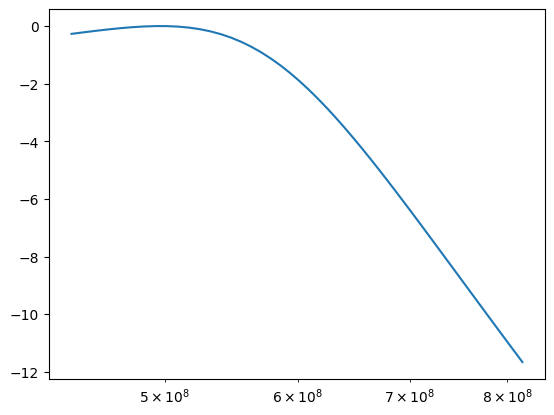

In [7]:
import matplotlib.pyplot as plt

plt.xscale("log")
plt.plot(omegas, -attenuation)

In [8]:
## Uses the math found within the RF Circuitry book to build an analytical model of the LPF Chebyshev filter we're building
def buildAtt(start_w, end_w):

    omegas = np.linspace(start_w, end_w, 1000000) * np.pi * 2

    freq_cutoff = 100e6
    omega_cutoff = freq_cutoff * 2 * np.pi
    pb_allowable_ripple = 0.5 # 1dB of allowable ripple in the passband
    
    epsilon = np.sqrt( np.pow(10, pb_allowable_ripple / 10) - 1)
    print("Epsilon ", epsilon)
    
    n = 3 # order that we're using
    
    B = 1/n * np.arccosh(1/epsilon)
    inv_ratio = (omegas/omega_cutoff) * np.cosh(B) # (w/wc)'

    attenuation = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_3(inv_ratio), 2)  )
    return (omegas, attenuation)

## Finds the index of the value closest to our desired value within an array
def find(arr, val):
    diff_mat = arr - np.ones(len(arr))*val
    return np.argmin(np.abs(diff_mat))

## Original Frequency Range Set Between 0 to 300 MHz

Epsilon  0.34931140018894796
Passband Edge:  99.95649995649997 MHz
Stopband Edge:  175.9042759042759 MHz
Insertion Loss:  0.0


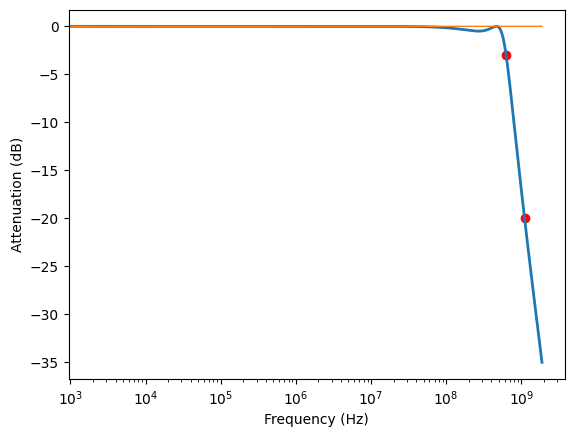

In [9]:
fig, axes = plt.subplots(1,1)
axes.set_xlabel("Frequency (Hz)")
axes.set_ylabel("Attenuation (dB)")

curr_start = 0; curr_end = 300e6
[oms, at] = buildAtt(curr_start, curr_end)
plt.xscale("log")
plt.plot(oms, -at, linewidth=2)

zeroes = np.zeros(1000000)

plt.plot(oms, zeroes, linewidth=1)

loc_at_3 = find(-at, -3);
freq_at_3 = oms[loc_at_3]/(2*np.pi)
att_at_3 = -at[loc_at_3]


loc_at_20 = find(-at, -20);
freq_at_20 = oms[loc_at_20]/(2*np.pi)
att_at_20 = -at[loc_at_20]

plt.scatter(oms[loc_at_3], -at[loc_at_3], c='red')
plt.scatter(oms[loc_at_20], -at[loc_at_20], c='red')

print("Passband Edge: ", freq_at_3/1e6, "MHz")
print("Stopband Edge: ", freq_at_20/1e6, "MHz")
print("Insertion Loss: ", at[0])

## Zooming on 70 MHz to 130 MHz, as specified by Prof. Spencer

Epsilon  0.34931140018894796


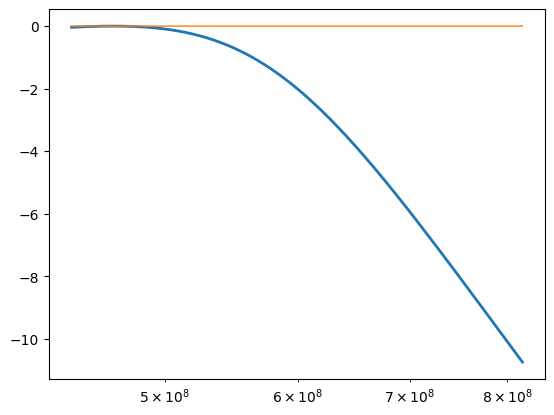

In [10]:
curr_start = 70e6; curr_end = 130e6
[oms, at] = buildAtt(curr_start, curr_end)
plt.xscale("log")
plt.plot(oms, -at, linewidth=2)

zeroes = np.zeros(1000000)

plt.plot(oms, zeroes, linewidth=1)

## Zooming in on the Parts of the full Frequency Span that we Care About

Epsilon  0.34931140018894796
Passband Edge:  99.95640995640994 MHz
Stopband Edge:  175.90424590424593 MHz
Insertion Loss:  0.062217124664675015


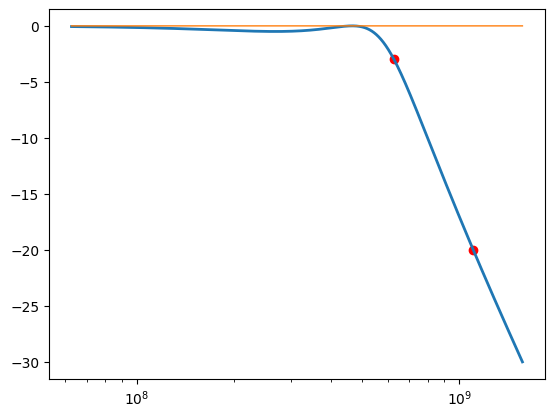

In [11]:
curr_start = 10e6; curr_end = 250e6
[oms, at] = buildAtt(curr_start, curr_end)
plt.xscale("log")
plt.plot(oms, -at, linewidth=2)

zeroes = np.zeros(1000000)

plt.plot(oms, zeroes, linewidth=1)

loc_at_3 = find(-at, -3);
freq_at_3 = oms[loc_at_3]/(2*np.pi)
att_at_3 = -at[loc_at_3]


loc_at_20 = find(-at, -20);
freq_at_20 = oms[loc_at_20]/(2*np.pi)
att_at_20 = -at[loc_at_20]

plt.scatter(oms[loc_at_3], -at[loc_at_3], c='red')
plt.scatter(oms[loc_at_20], -at[loc_at_20], c='red')

print("Passband Edge: ", freq_at_3/1e6, "MHz")

print("Stopband Edge: ", freq_at_20/1e6, "MHz")

print("Insertion Loss: ", at[0])

## A Closer Look at Passband Ripple

0.4999999999919422 dB of Ripple


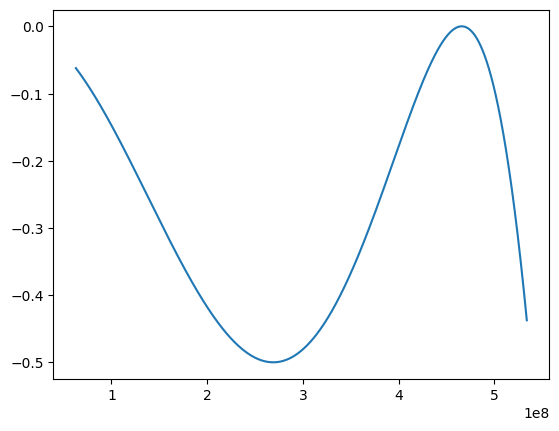

In [12]:
idx = int(1000000/8*2.5)
plt.plot(oms[0:idx], -at[0:idx])

print(np.max(-at[0:idx]) - np.min(-at[0:idx]), "dB of Ripple")

## So we messed up...
I create a file that runs a series of curves of different orders, which will hopefully help us find the actual Chebyshev filter

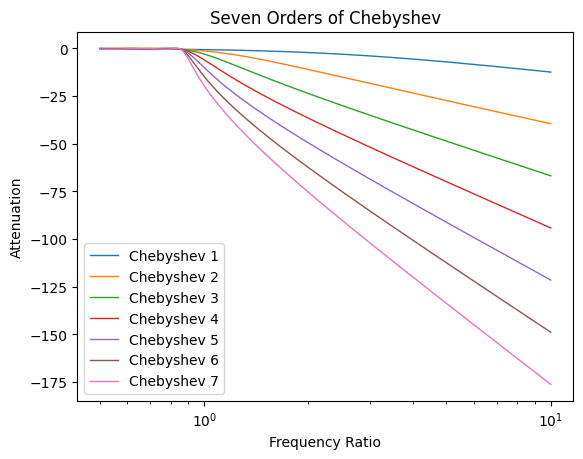

In [13]:
def C_1(x):
    return x

def C_2(x):
    cheb_2 = 2 * np.pow(x, 2) - 1
    return cheb_2

def C_3 (x):
    return 4 * np.power(x, 3) - 3 * x

def C_4(x):
    cheb_4 = 8 * np.pow(x, 4) - 8 * np.pow(x, 2) + 1
    return cheb_4

def C_5(x):
    cheb_5 = 16 * np.pow(x, 5) - 20 * np.pow(x, 3) + 5 * x
    return cheb_5
    
def C_6(x):
    cheb_6 = 32 * np.pow(x, 6) - 48 * np.pow(x, 4) + 18 * np.pow(x, 2) - 1
    return cheb_6

def C_7(x):
    cheb_7 = 64 * np.pow(x, 7) - 112 * np.pow(x, 5) + 56 * np.pow(x, 3) - 7 * x
    return cheb_7

freq_ratios = np.linspace(0.5, 10, 10000)
pb_allowable_ripple = 0.5
epsilon = np.sqrt( np.pow(10, pb_allowable_ripple / 10) - 1)
n = 3 # order that we're using

B = 1/n * np.arccosh(1/epsilon)
inv__freq_ratios = freq_ratios * np.cosh(B) # (w/wc)'

att1 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_1(inv__freq_ratios), 2))
att2 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_2(inv__freq_ratios), 2))
att3 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_3(inv__freq_ratios), 2))
att4 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_4(inv__freq_ratios), 2))
att5 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_5(inv__freq_ratios), 2))
att6 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_6(inv__freq_ratios), 2))
att7 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_7(inv__freq_ratios), 2))

fig, axes = plt.subplots(1,1)
axes.set_title("Seven Orders of Chebyshev")
axes.set_xlabel("Frequency Ratio")
axes.set_ylabel("Attenuation")
plt.xscale("log")
end = -1
plt.plot(freq_ratios[:end], -att1[:end], linewidth=1, label="Chebyshev 1")
plt.plot(freq_ratios[:end], -att2[:end], linewidth=1, label="Chebyshev 2")
plt.plot(freq_ratios[:end], -att3[:end], linewidth=1, label="Chebyshev 3")
plt.plot(freq_ratios[:end], -att4[:end], linewidth=1, label="Chebyshev 4")
plt.plot(freq_ratios[:end], -att5[:end], linewidth=1, label="Chebyshev 5")
plt.plot(freq_ratios[:end], -att6[:end], linewidth=1, label="Chebyshev 6")
plt.plot(freq_ratios[:end], -att7[:end], linewidth=1, label="Chebyshev 7")
plt.legend()

cutoff omega =  111465358.6756591 MHz
cutoff omega =  113754266.21160409 MHz
cutoff omega =  114746385.12738124 MHz


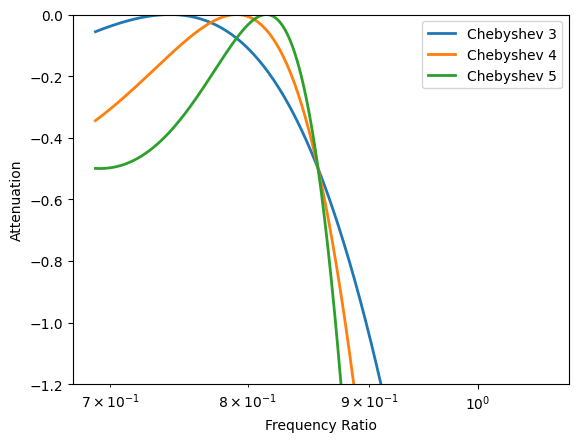

In [14]:
pb_allowable_ripple = 0.5
epsilon = np.sqrt( np.pow(10, pb_allowable_ripple / 10) - 1)
n = 3 # order that we're using
B = 1/n * np.arccosh(1/epsilon)

freq_ratios = np.linspace(0.5, 10, 10000)
inv__freq_ratios = freq_ratios * np.cosh(B) # (w/wc)'


fig, axes = plt.subplots(1,1)

att3 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_3(inv__freq_ratios), 2))
att4 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_4(inv__freq_ratios), 2))
att5 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_5(inv__freq_ratios), 2))
plt.xscale("log")
plt.axis([None, None, -1.2, 0])
axes.set_xlabel("Frequency Ratio")
axes.set_ylabel("Attenuation")
start=int(10000/50); end = int(10000/50 * 3)
plt.plot(freq_ratios[start:end], -att3[start:end], linewidth=2, label="Chebyshev 3")
plt.plot(freq_ratios[start:end], -att4[start:end], linewidth=2, label="Chebyshev 4")
plt.plot(freq_ratios[start:end], -att5[start:end], linewidth=2, label="Chebyshev 5")
plt.legend()

cheb_3_pB = find(-att3, -1)
cheb_4_pB = find(-att4, -1)
cheb_5_pB = find(-att5, -1)

print("cutoff omega = ", 100e6/(freq_ratios[cheb_3_pB]), "MHz")
print("cutoff omega = ", 100e6/(freq_ratios[cheb_4_pB]), "MHz")
print("cutoff omega = ", 100e6/(freq_ratios[cheb_5_pB]), "MHz")

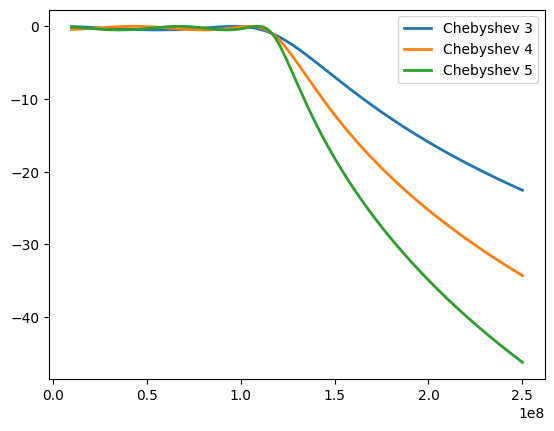

In [15]:
## find attenuation at the stop band, or 200/cutoff omega

cutoff_omega3 = 100e6/(freq_ratios[cheb_3_pB])
cutoff_omega4 = 100e6/(freq_ratios[cheb_4_pB])
cutoff_omega5 = 100e6/(freq_ratios[cheb_5_pB])

omegas_new = np.linspace(10e6, 250e6, 100000)

fixed_att3 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_3(omegas_new/cutoff_omega3), 2))
fixed_att4 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_4(omegas_new/cutoff_omega4), 2))
fixed_att5 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_5(omegas_new/cutoff_omega5), 2))

plt.plot(omegas_new, -fixed_att3, linewidth=2, label="Chebyshev 3")
plt.plot(omegas_new, -fixed_att4, linewidth=2, label="Chebyshev 4")
plt.plot(omegas_new, -fixed_att5, linewidth=2, label="Chebyshev 5")

plt.legend()

In [16]:
pb_allowable_ripple = 0.5
epsilon = np.sqrt( np.pow(10, pb_allowable_ripple / 10) - 1)
n = 3 # order that we're using
B = 1/n * np.arccosh(1/epsilon)

inv_C3_20 = 200e6/cutoff_omega3 * np.cosh(B) # (w/wc)'
inv_C4_20 = 200e6/cutoff_omega4 * np.cosh(B) # (w/wc)'
inv_C5_20 = 200e6/cutoff_omega5 * np.cosh(B) # (w/wc)'

calc3 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_3(inv_C3_20), 2))
calc4 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_4(inv_C4_20), 2))
calc5 = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_5(inv_C5_20), 2))

print(calc3)
print(calc4)
print(calc5)

20.584063176323383
31.640562302002564
42.90364221898756


### A different check, as well, to really make sure everything's ok

Cutoff Band:  100.0 , Passband value  89.7359973599736 MHz
Cutoff Band:  101.05263157894737 , Passband value  90.68160681606815 MHz
Cutoff Band:  102.10526315789473 , Passband value  91.62721627216273 MHz
Cutoff Band:  103.15789473684211 , Passband value  92.57042570425705 MHz
Cutoff Band:  104.21052631578948 , Passband value  93.5160351603516 MHz
Cutoff Band:  105.26315789473684 , Passband value  94.45924459244593 MHz
Cutoff Band:  106.3157894736842 , Passband value  95.40485404854049 MHz
Cutoff Band:  107.36842105263158 , Passband value  96.35046350463504 MHz
Cutoff Band:  108.42105263157895 , Passband value  97.29367293672937 MHz
Cutoff Band:  109.47368421052632 , Passband value  98.23928239282392 MHz
Cutoff Band:  110.52631578947368 , Passband value  99.18249182491824 MHz
Cutoff Band:  111.57894736842105 , Passband value  100.1281012810128 MHz
Cutoff Band:  112.63157894736841 , Passband value  101.07131071310712 MHz
Cutoff Band:  113.6842105263158 , Passband value  102.016920169201

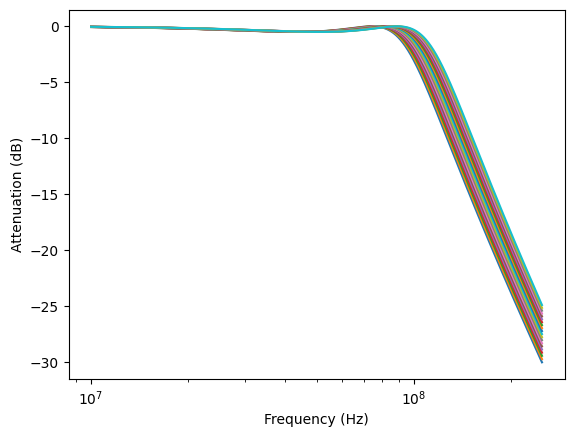

In [17]:
vals_cutoff = np.linspace(100e6, 120e6, 20)
varying_freq_for_cutoff = [np.ones(100000) * vals_cutoff[i] for i in range(len(vals_cutoff))]
omegas = np.linspace(10e6, 250e6, 100000)

fig, axes = plt.subplots(1,1)

freq_ratio_variedcutoff = omegas/varying_freq_for_cutoff
inv_varying_freq_ratios = freq_ratio_variedcutoff * np.cosh(B) # (w/wc)'

att3_cutoffs_varied = 10 * np.log10(1 + np.power(epsilon, 2) * np.power( C_3(inv_varying_freq_ratios), 2))
i = 0
plt.xscale("log")
axes.set_xlabel("Frequency (Hz)")
axes.set_ylabel("Attenuation (dB)")
for arr in att3_cutoffs_varied:
    plt.plot(omegas, -arr)
    loc_1dB = find(-arr, -1)
    print("Cutoff Band: ", vals_cutoff[i]/1e6, ", Passband value ", omegas[loc_1dB]/1e6, "MHz")
    i = i+1

In [18]:
freq, atten = buildAtt(50e6, 130e6)

analyticalRF = rf.Network(frequency = freq, s = atten)

Epsilon  0.34931140018894796


# LTSpice Simulation Results

Graphs the Smith chart, magnitude chart, and phase chart of the LTSpice Simulation

## Defining Function that will Help Graph Magnitude Plots

In [19]:
def plotPhaseAndDb(network, plotPts, axes, c, title):
    axes[0].set_title(f"Magnitude of {title}")
    axes[1].set_title(f"Phase of {title}")
    
    network.plot_s_db(ax=axes[0], color=c[0], linewidth=4)

    if(plotPts):
        my_arr = network.s_db[:,0,0]
        my_frq = network.f
        
        loc_at_3 = find(my_arr, -3)
        freq_at_3 = my_frq[loc_at_3]/(2*np.pi)
        att_at_3 = my_arr[loc_at_3]
        
        loc_at_20 = find(my_arr, -20)
        freq_at_20 = my_frq[loc_at_20]/(2*np.pi)
        att_at_20 = my_arr[loc_at_20]
        
        axes[0].scatter(my_frq[loc_at_3], my_arr[loc_at_3], c='blue')
        axes[0].annotate(f"   Passband Freq: ({my_frq[loc_at_3]/1e6:0.2f} MHz, {my_arr[loc_at_3]:0.2f} dB)", (my_frq[loc_at_3], my_arr[loc_at_3]) )
        axes[0].scatter(my_frq[loc_at_20], my_arr[loc_at_20], c='pink')
        axes[0].annotate(f"   Stopband Freq: ({my_frq[loc_at_20]/1e6:0.2f} MHz, {my_arr[loc_at_20]:0.2f} dB)", (my_frq[loc_at_20], my_arr[loc_at_20]) )

    network.plot_s_deg(ax=axes[1], color=c[1], linewidth=4)

## Graphing the S11 and S21's Magnitude Plot: 70 MHz to 130 MHz

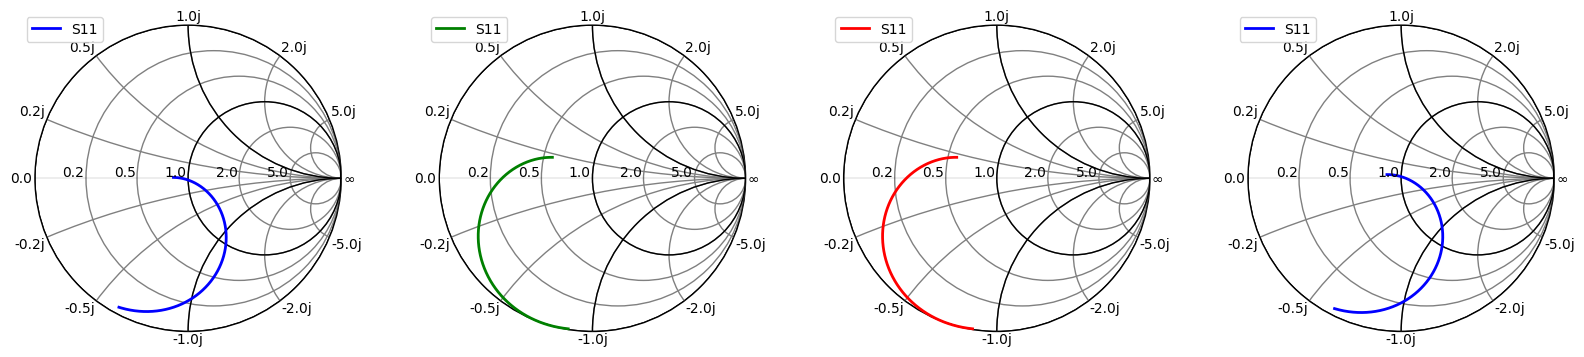

In [20]:
filename = "dp1_70_to_130.txt"

frequency_arr = []
s_arr = []

with open(filename, 'r') as input_file:
    line_array = input_file.readlines()

    # Change first line to s1p format
    line_array[0] = "# MHz S MA R 50"

    j = 0
    # LTspice exports with commas, change to spaces
    for idx, line in enumerate(line_array[1:]):
        line_array[idx] = line.replace(",", " ")
        
        arr = [float(x) for x in line_array[idx].split()]
        
        frequency_arr.append(arr[0])
        
        s_arr.append([[arr[1]+1j*arr[2], arr[3]+1j*arr[4]],
                      [arr[5]+1j*arr[6], arr[7]+1j*arr[8]]])

f_arr = np.array(frequency_arr)
svals_arr = np.array(s_arr)

fig, axes = plt.subplots(1,4, figsize=[20,30])

s11 = rf.Network(frequency = f_arr, s = svals_arr[:,0,0])
s12 = rf.Network(frequency = f_arr, s = svals_arr[:,0,1])
s21 = rf.Network(frequency = f_arr, s = svals_arr[:,1,0])
s22 = rf.Network(frequency = f_arr, s = svals_arr[:,1,1])
s11.plot_s_smith(ax=axes[0], draw_labels=True, color='b', linewidth=2)
s12.plot_s_smith(ax=axes[1], draw_labels=True, color='g', linewidth=2)
s21.plot_s_smith(ax=axes[2], draw_labels=True, color='r', linewidth=2)
s22.plot_s_smith(ax=axes[3], draw_labels=True, color='b', linewidth=2)

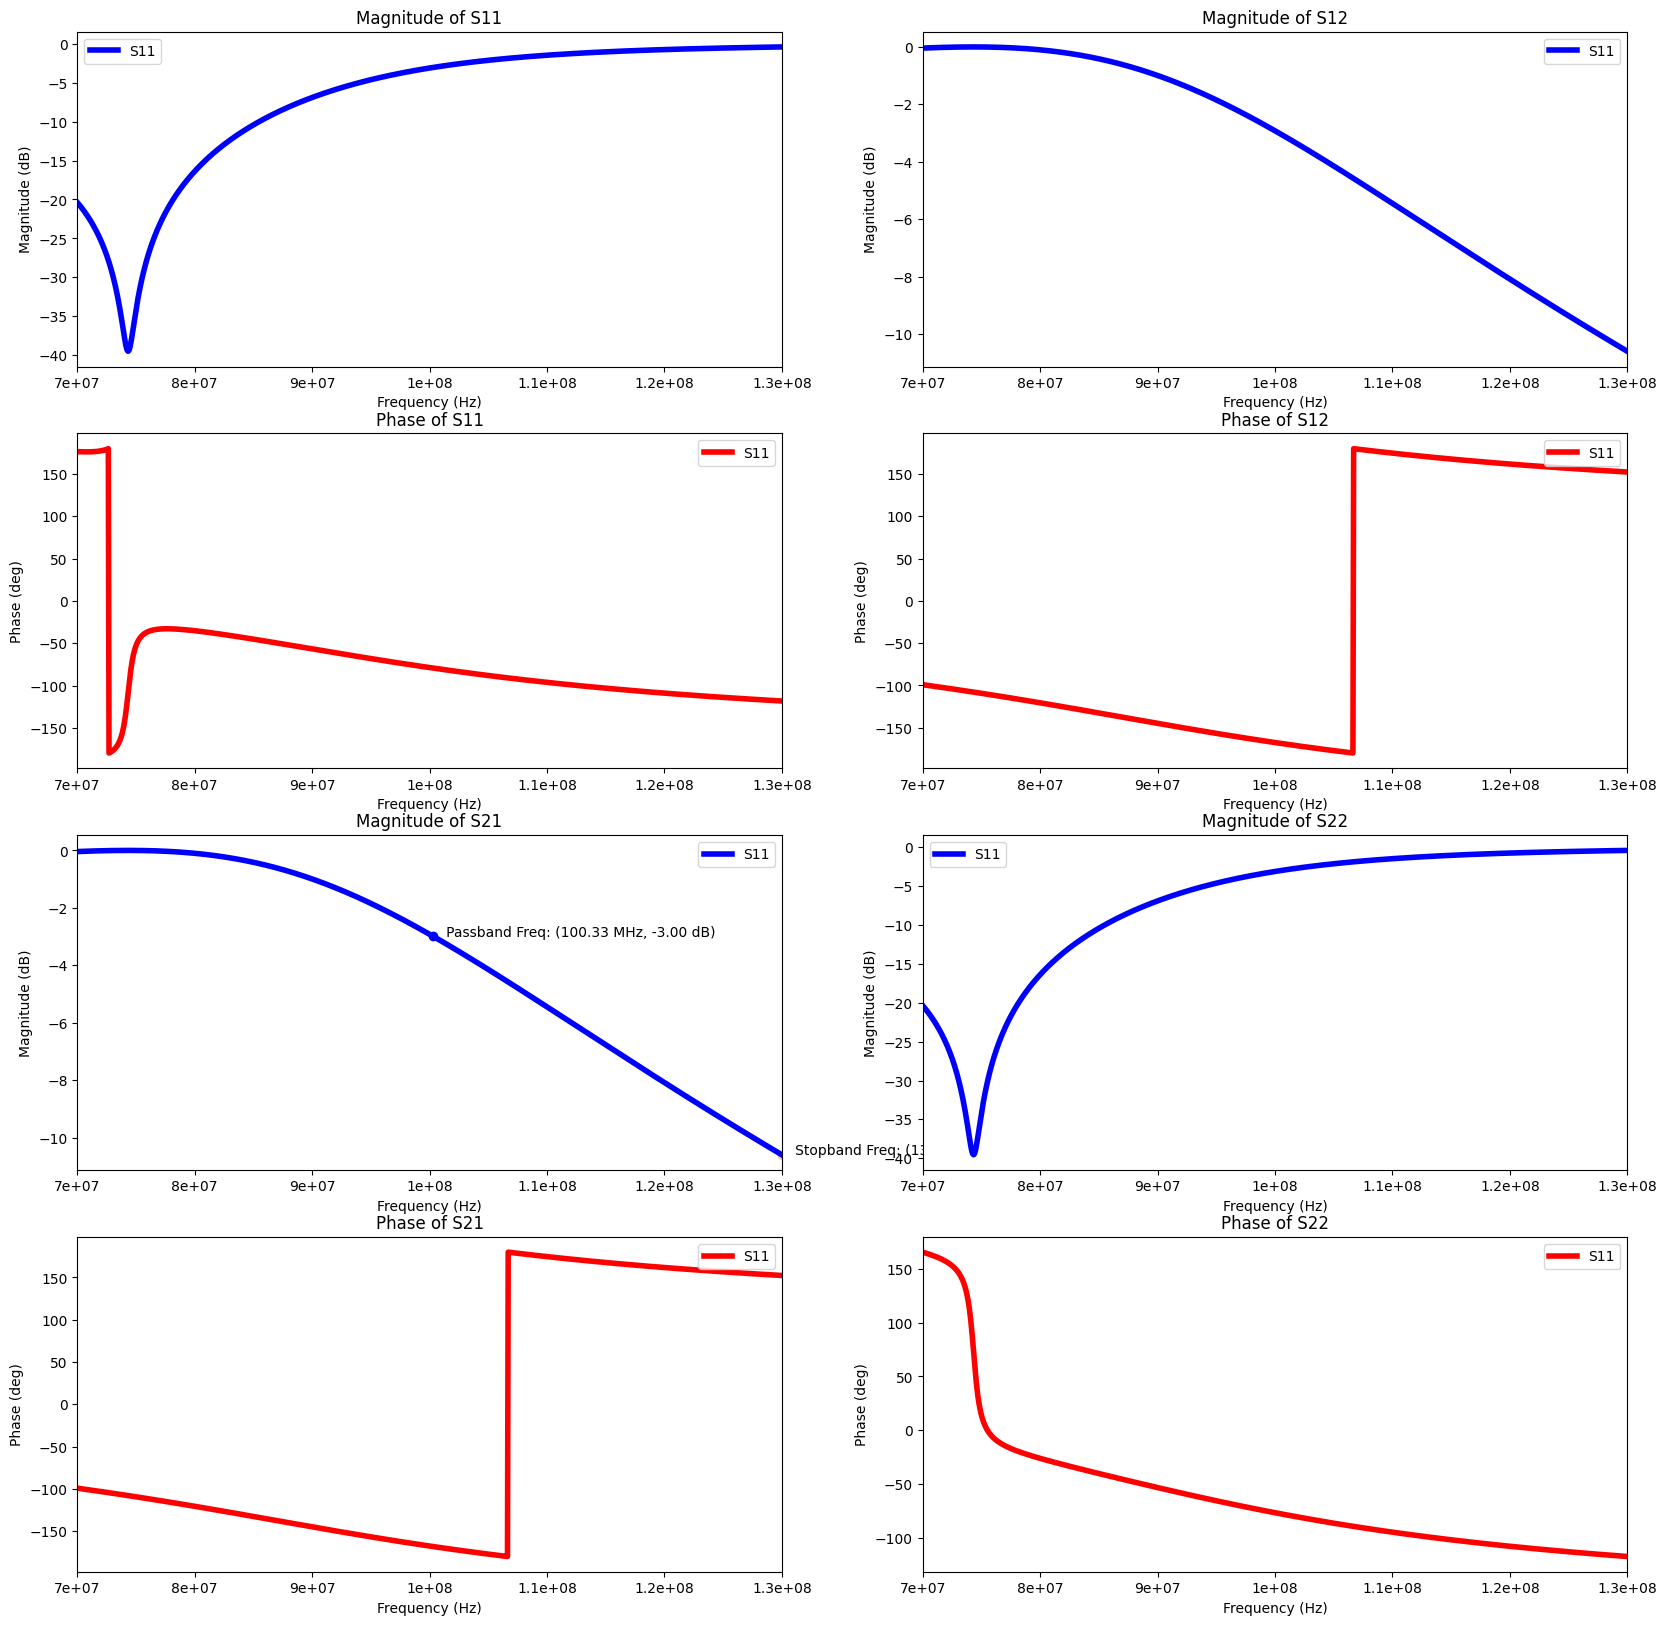

In [21]:
fig, axes = plt.subplots(4,2, figsize=[20,20])
mag_color = 'b'; deg_color = 'r'

plotPhaseAndDb(s11, False, axes[0:2, 0], [mag_color, deg_color], "S11")
plotPhaseAndDb(s12, False, axes[0:2, 1], [mag_color, deg_color], "S12")
plotPhaseAndDb(s21, True, axes[2:4, 0], [mag_color, deg_color], "S21")
plotPhaseAndDb(s22, False, axes[2:4, 1], [mag_color, deg_color], "S22")

In [22]:
filename = "dsp1_50to130.txt"

frequency_arr = []
s_arr = []

with open(filename, 'r') as input_file:
    line_array = input_file.readlines()

    # Change first line to s1p format
    line_array[0] = "# MHz S MA R 50"

    j = 0
    # LTspice exports with commas, change to spaces
    for idx, line in enumerate(line_array[1:]):
        line_array[idx] = line.replace(",", " ")
        
        arr = [float(x) for x in line_array[idx].split()]
        
        frequency_arr.append(arr[0])
        
        s_arr.append([[arr[1]+1j*arr[2], arr[3]+1j*arr[4]],
                      [arr[5]+1j*arr[6], arr[7]+1j*arr[8]]])

f_arr = np.array(frequency_arr)
svals_arr = np.array(s_arr)

s21_Ideal = rf.Network(frequency = f_arr, s = svals_arr[:,1,0])

## Graphing the S11 and S21's Magnitude Plot: 0Hz - 300 MHz

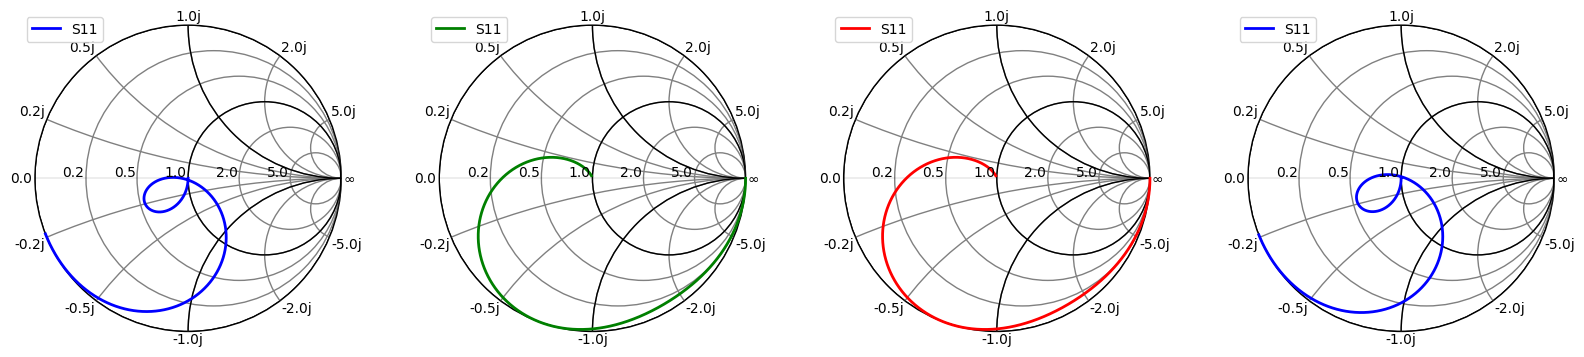

In [23]:
filename = "dp1_1_to_300M.txt"

frequency_arr = []
s_arr = []

with open(filename, 'r') as input_file:
    line_array = input_file.readlines()

    # Change first line to s1p format
    line_array[0] = "# MHz S MA R 50"

    j = 0
    # LTspice exports with commas, change to spaces
    for idx, line in enumerate(line_array[1:]):
        line_array[idx] = line.replace(",", " ")
        
        arr = [float(x) for x in line_array[idx].split()]
        
        frequency_arr.append(arr[0])
        
        s_arr.append([[arr[1]+1j*arr[2], arr[3]+1j*arr[4]],
                      [arr[5]+1j*arr[6], arr[7]+1j*arr[8]]])

f_arr = np.array(frequency_arr)
svals_arr = np.array(s_arr)

fig, axes = plt.subplots(1,4, figsize=[20,30])

s11 = rf.Network(frequency = f_arr, s = svals_arr[:,0,0])
s12 = rf.Network(frequency = f_arr, s = svals_arr[:,0,1])
s21 = rf.Network(frequency = f_arr, s = svals_arr[:,1,0])
s22 = rf.Network(frequency = f_arr, s = svals_arr[:,1,1])
s11.plot_s_smith(ax=axes[0], draw_labels=True, color='b', linewidth=2)
s12.plot_s_smith(ax=axes[1], draw_labels=True, color='g', linewidth=2)
s21.plot_s_smith(ax=axes[2], draw_labels=True, color='r', linewidth=2)
s22.plot_s_smith(ax=axes[3], draw_labels=True, color='b', linewidth=2)

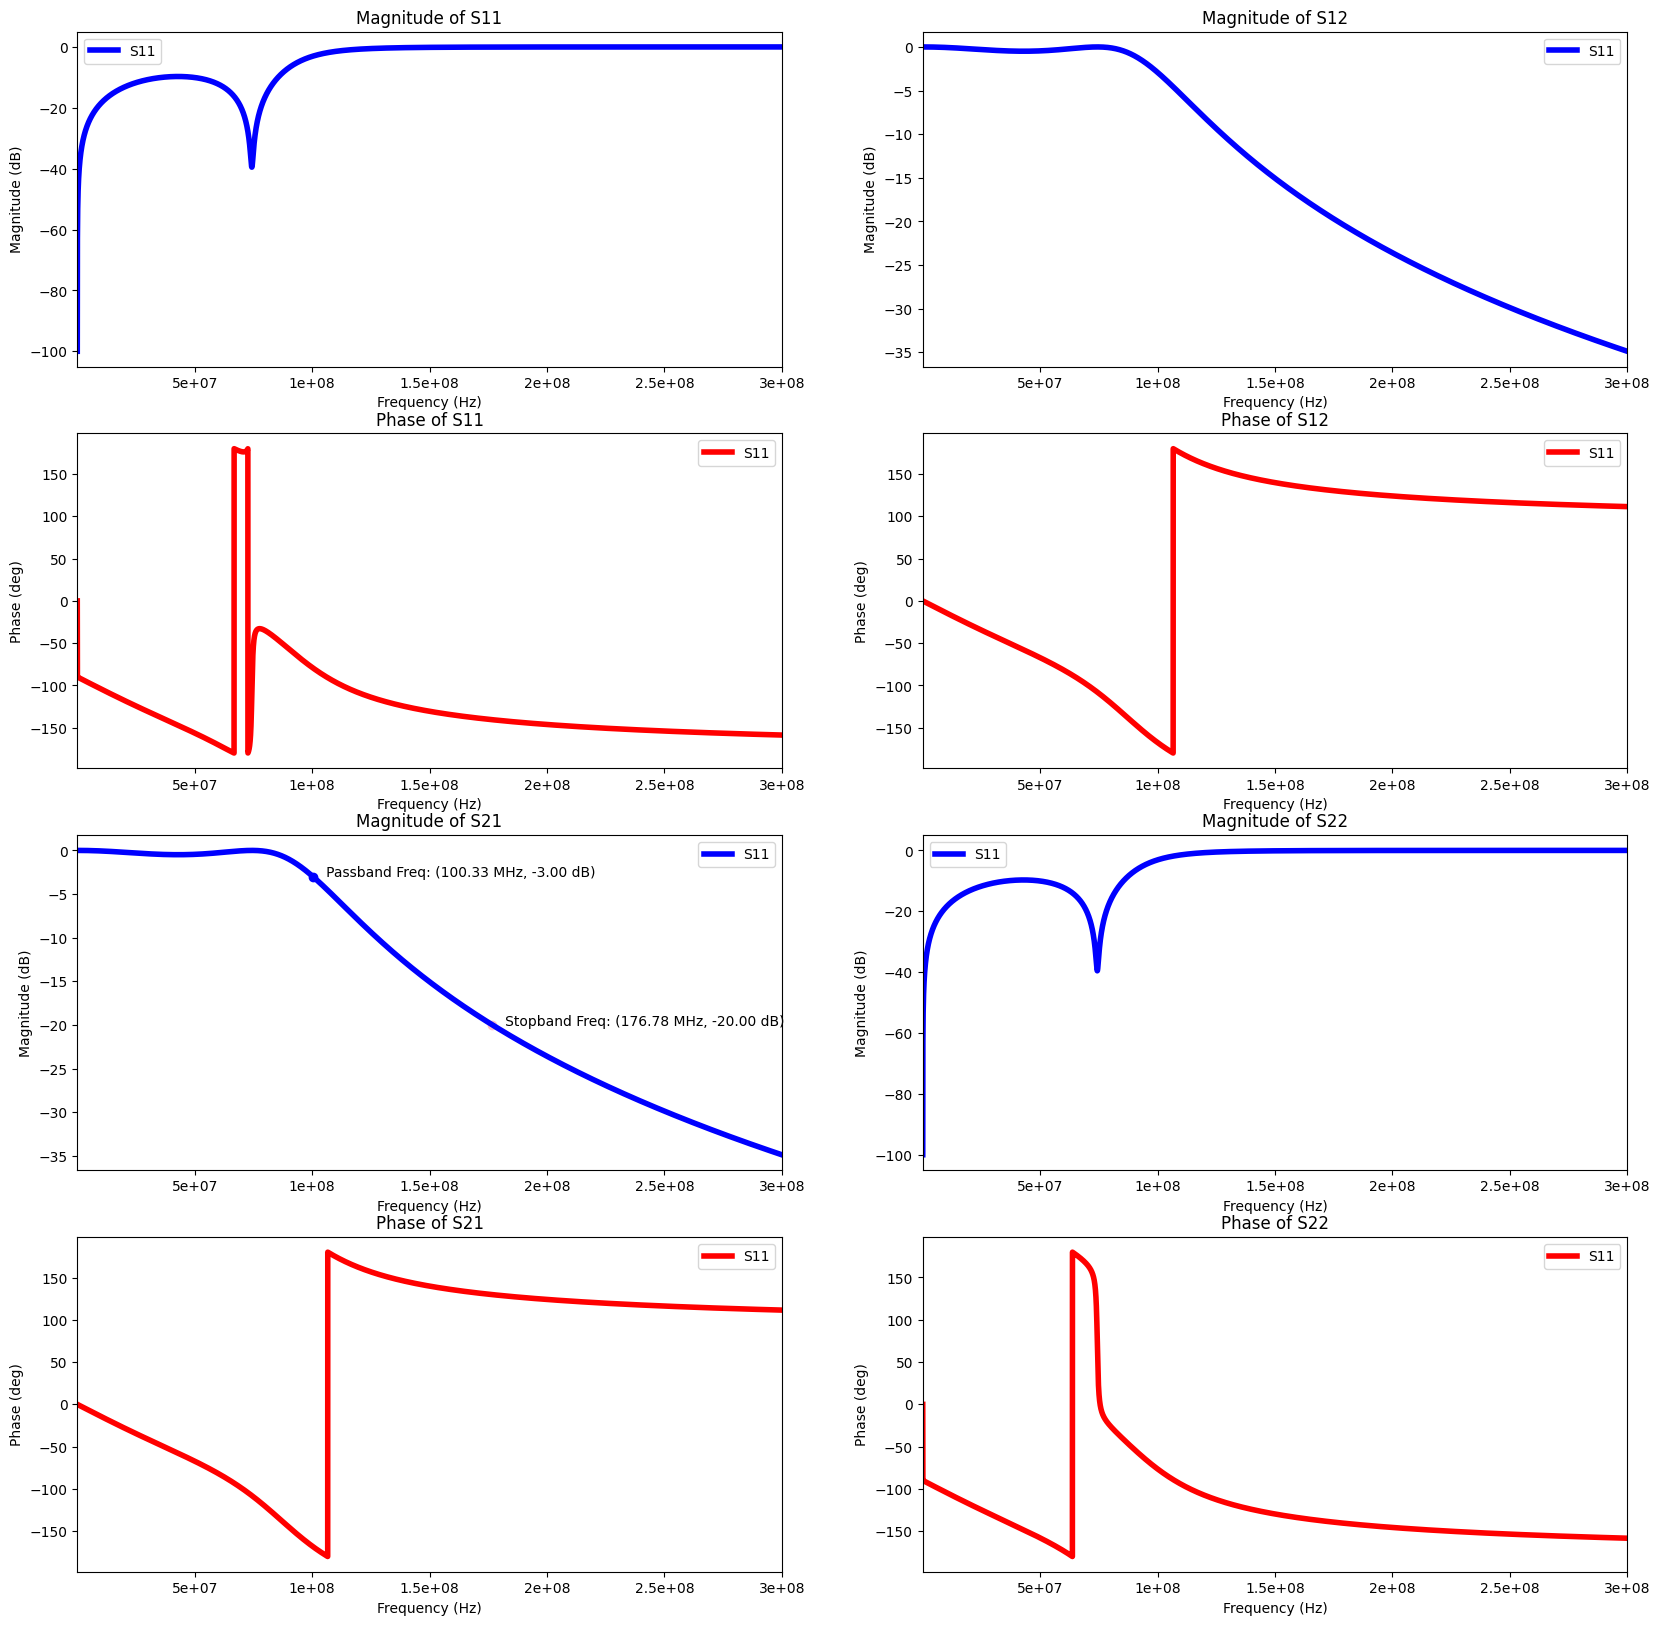

In [24]:
fig, axes = plt.subplots(4,2, figsize=[20,20])
mag_color = 'b'; deg_color = 'r'

plotPhaseAndDb(s11, False, axes[0:2, 0], [mag_color, deg_color], "S11")
plotPhaseAndDb(s12, False, axes[0:2, 1], [mag_color, deg_color], "S12")
plotPhaseAndDb(s21, True, axes[2:4, 0], [mag_color, deg_color], "S21")
plotPhaseAndDb(s22, False, axes[2:4, 1], [mag_color, deg_color], "S22")

Insertion Loss:  -8.68584255884301e-05


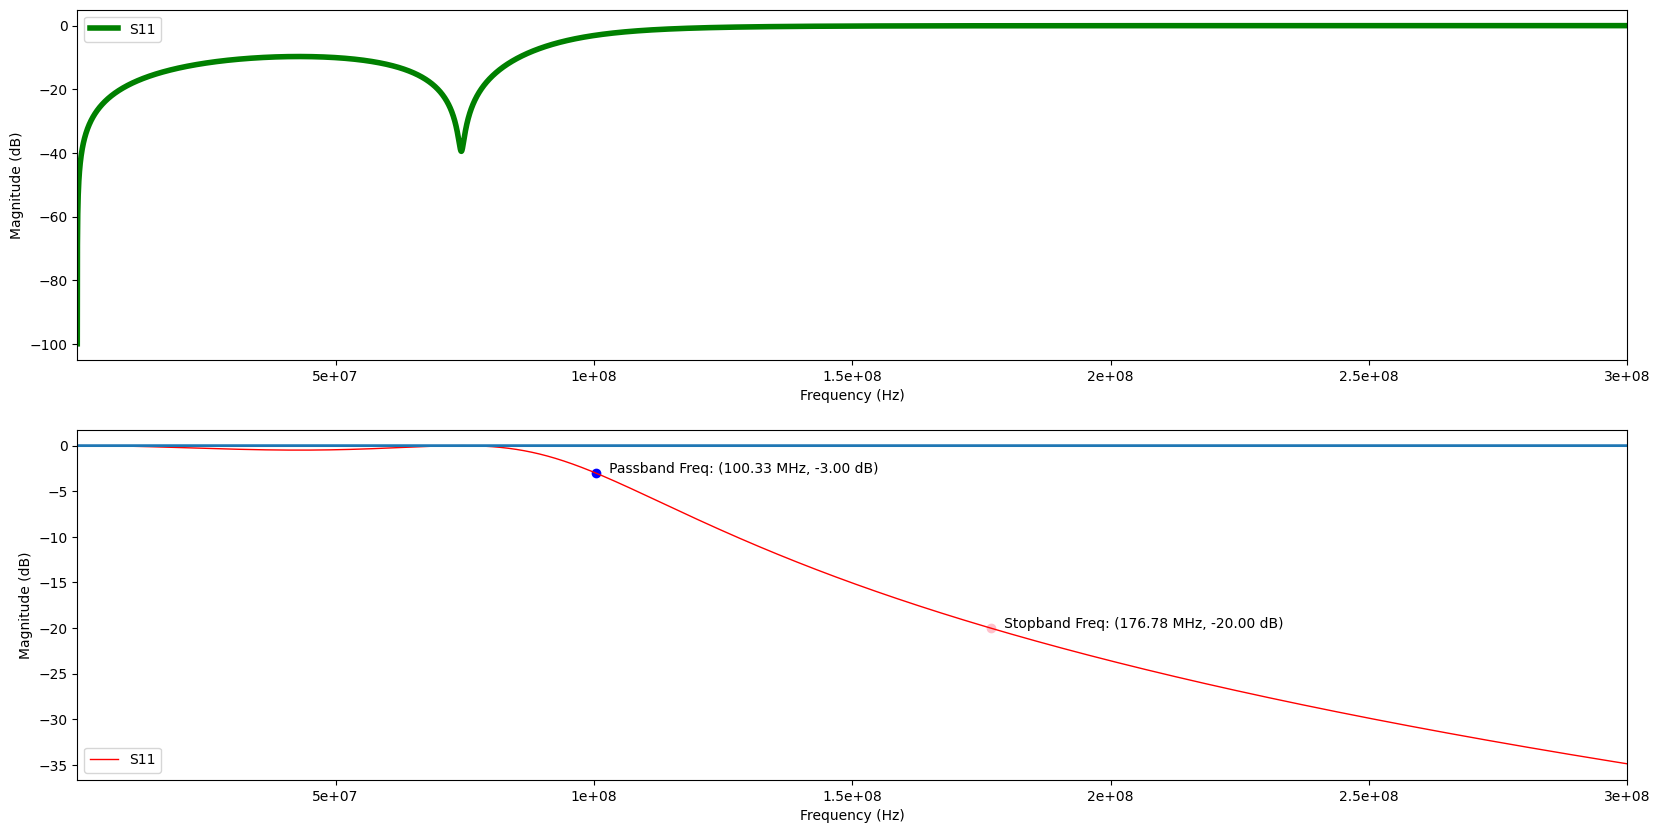

In [25]:
## plotting the magnitude and phase data desired

start_val = s21.s_db[0]

my_arr = s21.s_db[:,0,0]
my_frq = s21.f

loc_at_3 = find(my_arr, -3)
freq_at_3 = my_frq[loc_at_3]/(2*np.pi)
att_at_3 = my_arr[loc_at_3]

loc_at_20 = find(my_arr, -20)
freq_at_20 = my_frq[loc_at_20]/(2*np.pi)
att_at_20 = my_arr[loc_at_20]

fig2, ax2 = plt.subplots(2,1, figsize=[20,10])

s11.plot_s_db(ax=ax2[0], color='g', linewidth=4)
s21.plot_s_db(ax=ax2[1], color='r', linewidth=1)

sval = (np.ones(len(s21.s_db)) * start_val).T
ax2[1].plot(s21.f, sval, linewidth=2)

ax2[1].scatter(my_frq[loc_at_3], my_arr[loc_at_3], c='blue')
ax2[1].annotate(f"   Passband Freq: ({my_frq[loc_at_3]/1e6:0.2f} MHz, {my_arr[loc_at_3]:0.2f} dB)", (my_frq[loc_at_3], my_arr[loc_at_3]) )

ax2[1].scatter(my_frq[loc_at_20], my_arr[loc_at_20], c='pink')
ax2[1].annotate(f"   Stopband Freq: ({my_frq[loc_at_20]/1e6:0.2f} MHz, {my_arr[loc_at_20]:0.2f} dB)", (my_frq[loc_at_20], my_arr[loc_at_20]) )

print("Insertion Loss: ", start_val[0][0])

### Finding the Passband of the System

0.4909297625102878


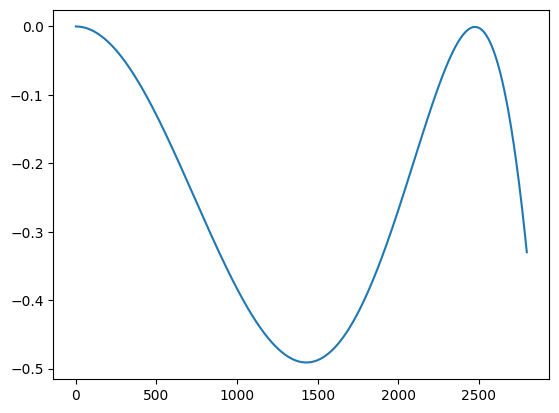

In [26]:
db_orig = s21.s_db[:,0,0]
window_db = db_orig[0:int(len(s21.s_db)*0.28)]
plt.plot(window_db)

print(np.max(window_db) - np.min(window_db))

## Plotting using the Real Components

The ESR Of The Capacitors:
https://www.mouser.com/datasheet/2/447/UPY_High_Q_NP0_16V_to_250V_16-3003035.pdf
* "Measuring frequency: 500 ± 50MHz at room temperature. 10pF < C ≤ 100pF :400mΩ max"
* Q = 400 + 20*C

https://www.johansontechnology.com/tech-notes/q-esr-explained/
-> ESR = |X_C| / Q
47 pF -- 
10 pF -- 

Internal Resistance of the Inductors:
https://microchip.ua/shareway/SDCL1608C.pdf

**At 100 MHz, Quality Factors:**
* 1.8 nH +/- 0.3, Q = 11 --> R = 0.1028157596
* 100 nH, Q = 10 --> R = 6.283185307

In [27]:
print(1/(2*np.pi*100e6*(400+20*20)))

1.989436788648692e-12


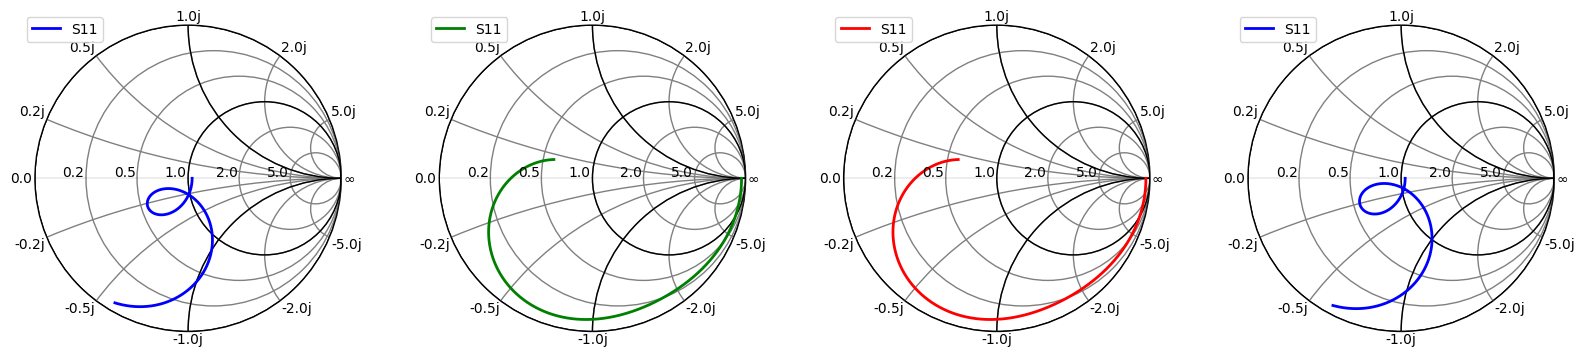

In [38]:
filename="dp1_real_1to300MHz.txt"
frequency_arr = []
s_arr = []

with open(filename, 'r') as input_file:
    line_array = input_file.readlines()

    # Change first line to s1p format
    line_array[0] = "# MHz S MA R 50"

    j = 0
    # LTspice exports with commas, change to spaces
    for idx, line in enumerate(line_array[1:]):
        line_array[idx] = line.replace(",", " ")
        
        arr = [float(x) for x in line_array[idx].split()]
        
        frequency_arr.append(arr[0])
        
        s_arr.append([[arr[1]+1j*arr[2], arr[3]+1j*arr[4]],
                      [arr[5]+1j*arr[6], arr[7]+1j*arr[8]]])

f_arr = np.array(frequency_arr)
svals_arr = np.array(s_arr)

fig, axes = plt.subplots(1,4, figsize=[20,30])

s11 = rf.Network(frequency = f_arr, s = svals_arr[:,0,0])
s12 = rf.Network(frequency = f_arr, s = svals_arr[:,0,1])
s21 = rf.Network(frequency = f_arr, s = svals_arr[:,1,0])
s22 = rf.Network(frequency = f_arr, s = svals_arr[:,1,1])
s11.plot_s_smith(ax=axes[0], draw_labels=True, color='b', linewidth=2)
s12.plot_s_smith(ax=axes[1], draw_labels=True, color='g', linewidth=2)
s21.plot_s_smith(ax=axes[2], draw_labels=True, color='r', linewidth=2)
s22.plot_s_smith(ax=axes[3], draw_labels=True, color='b', linewidth=2)

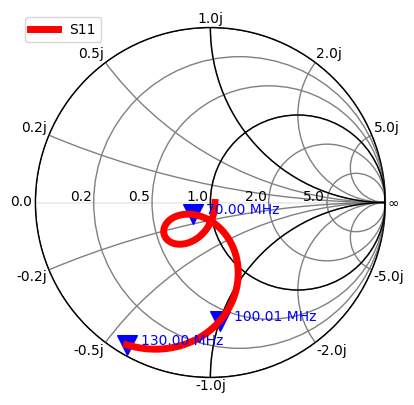

In [51]:
fig, axes = plt.subplots(1,1, figsize=[5,5])
s11.plot_s_smith(m=0, n=0, ax=axes, draw_labels=True, color='r', linewidth=5)

marker_idx = [30, 60, 90]

start_val = real_data_22.s_db[0]
sval = (np.ones(len(real_data_22.s_db)) * start_val).T

my_arr = s11.s_db[:,0,0]
my_frq = s11.f

loc_at_3 = find(my_arr, -3)
freq_at_3 = my_frq[loc_at_3]/(2*np.pi)
att_at_3 = my_arr[loc_at_3]

loc_at_20 = find(my_arr, -20)
freq_at_20 = my_frq[loc_at_20]/(2*np.pi)
att_at_20 = my_arr[loc_at_20]

loc_100MHz = find(my_frq, 100e6)
loc_70MHz = find(my_frq, 70e6)
loc_300MHz = find(my_frq, 300e6)
marker_idx = [loc_70MHz, loc_100MHz, loc_300MHz]

for i, k in enumerate(marker_idx):
    x = s11.s.real[k, 0, 0]
    y = s11.s.imag[k, 0, 0]
    f = s11.frequency.f_scaled[k]
    axes.scatter(x, y, marker = 'v', s=200, color='b')
    axes.annotate(f"{my_frq[k]/1e6:.2f} MHz", (x, y), xytext=(10, 0), textcoords='offset points', color='b')

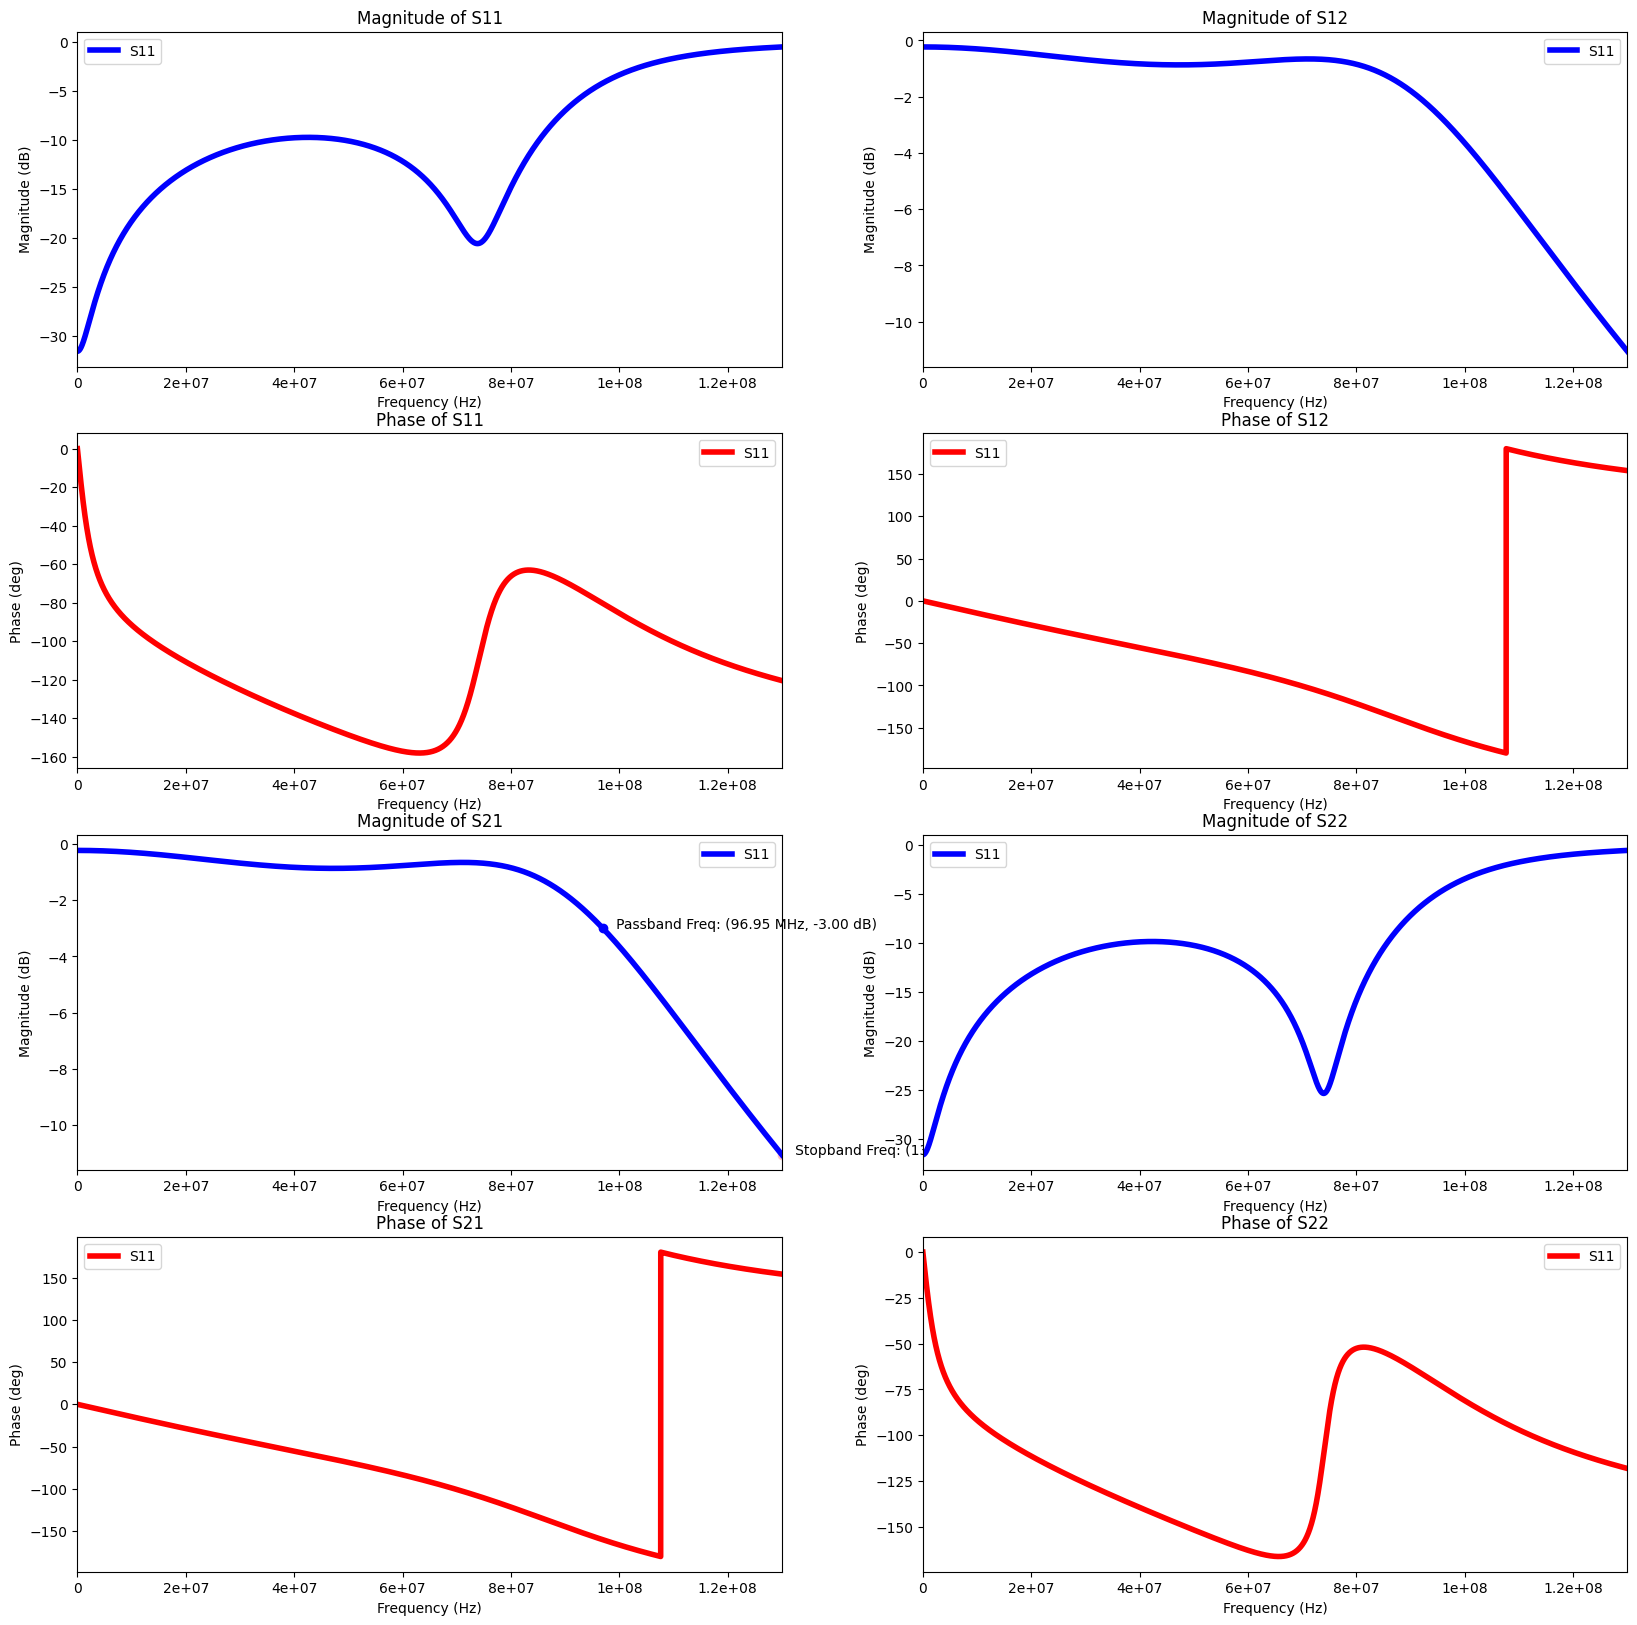

In [29]:
fig, axes = plt.subplots(4,2, figsize=[20,20])
mag_color = 'b'; deg_color = 'r'

plotPhaseAndDb(s11, False, axes[0:2, 0], [mag_color, deg_color], "S11")
plotPhaseAndDb(s12, False, axes[0:2, 1], [mag_color, deg_color], "S12")
plotPhaseAndDb(s21, True, axes[2:4, 0], [mag_color, deg_color], "S21")
plotPhaseAndDb(s22, False, axes[2:4, 1], [mag_color, deg_color], "S22")

0.1348599021332898
-0.23157802101447628


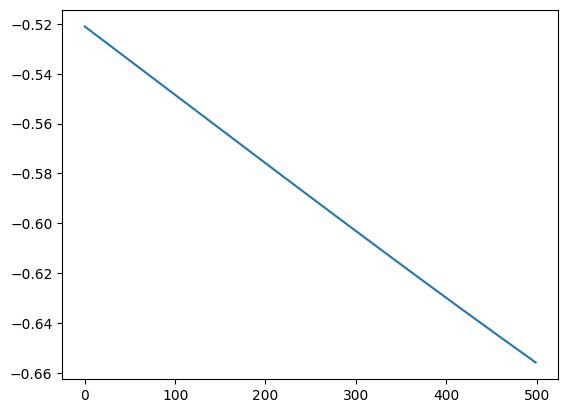

In [30]:
db_orig = s21.s_db[:,0,0]
window_db = db_orig[int(len(s21.s_db)*0.17):int(len(s21.s_db)*0.22)]
plt.plot(window_db)

print(np.max(window_db) - np.min(window_db))
print(db_orig[0])

In [31]:
filename="dp1_real_30Mto130MHz.txt"
frequency_arr = []
s_arr = []

with open(filename, 'r') as input_file:
    line_array = input_file.readlines()

    # Change first line to s1p format
    line_array[0] = "# MHz S MA R 50"

    j = 0
    # LTspice exports with commas, change to spaces
    for idx, line in enumerate(line_array[1:]):
        line_array[idx] = line.replace(",", " ")
        
        arr = [float(x) for x in line_array[idx].split()]
        
        frequency_arr.append(arr[0])
        
        s_arr.append([[arr[1]+1j*arr[2], arr[3]+1j*arr[4]],
                      [arr[5]+1j*arr[6], arr[7]+1j*arr[8]]])

f_arr = np.array(frequency_arr)
svals_arr = np.array(s_arr)

s21_RealSim = rf.Network(frequency = f_arr, s = svals_arr[:,1,0])

## Graphing In Lab Data

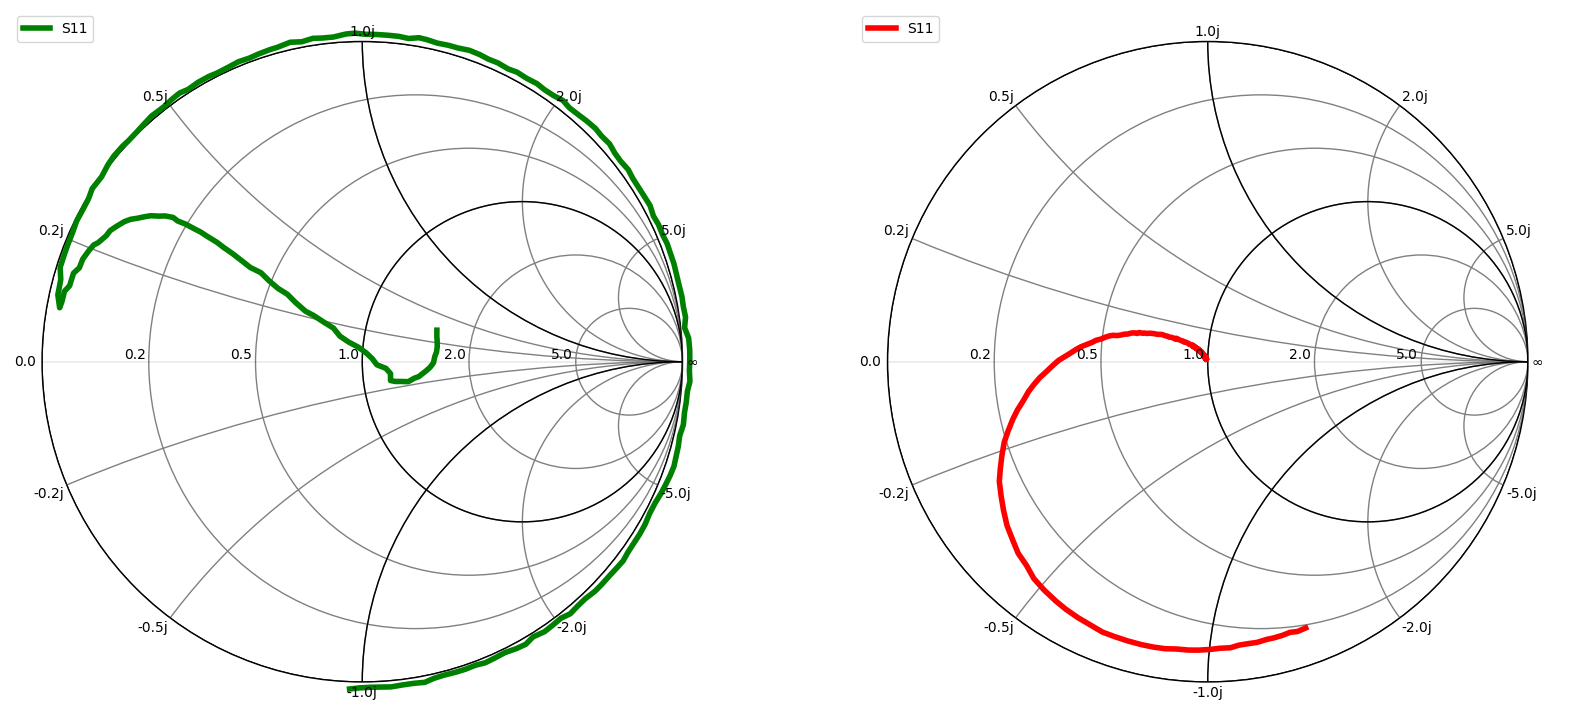

In [32]:
import pandas as pd

fig, axes = plt.subplots(1,2, figsize=[20,30])

csv5 = pd.read_csv('CSV5.csv', skiprows=13)
csv5.columns = ['Frequency', 'Z_Real', 'Z_Imag', 'components', 'H']
csv5['Z_n'] = csv5['Z_Real']/50 + 1j*csv5['Z_Imag']/50
csv5['S_11'] = ( csv5['Z_n']-1 ) / ( csv5['Z_n']+1 )
real_data_11 = rf.Network(frequency = csv5['Frequency'], s = csv5['S_11'])
real_data_11.plot_s_smith(ax=axes[0], draw_labels=True, color='g', linewidth=4)

csv6 = pd.read_csv('CSV6.csv', skiprows=13)
csv6.columns = ['Frequency', 'Z_Real', 'Z_Imag', 'components', 'H']
csv6['Z_n'] = csv6['Z_Real']/50 + 1j*csv6['Z_Imag']/50
csv6['S_21'] = ( csv6['Z_n']-1 ) / ( csv6['Z_n']+1 )
real_data_22 = rf.Network(frequency = csv6['Frequency'], s = csv6['S_21'])
real_data_22.plot_s_smith(ax=axes[1], draw_labels=True, color='r', linewidth=4)

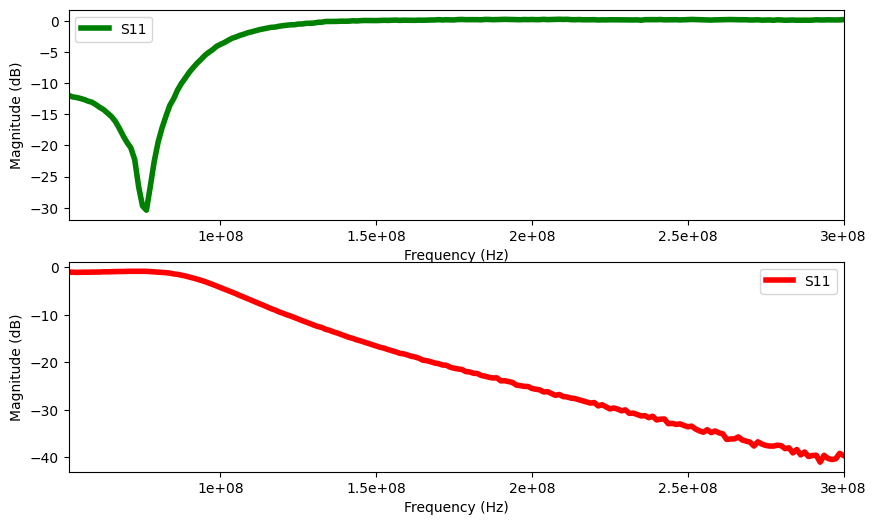

In [33]:
fig, axes = plt.subplots(2,1, figsize=[10,6])

fig.title = ("Lost it")

real_data_11.plot_s_db(ax=axes[0], color='g', linewidth=4)
real_data_22.plot_s_db(ax=axes[1], color='r', linewidth=4)

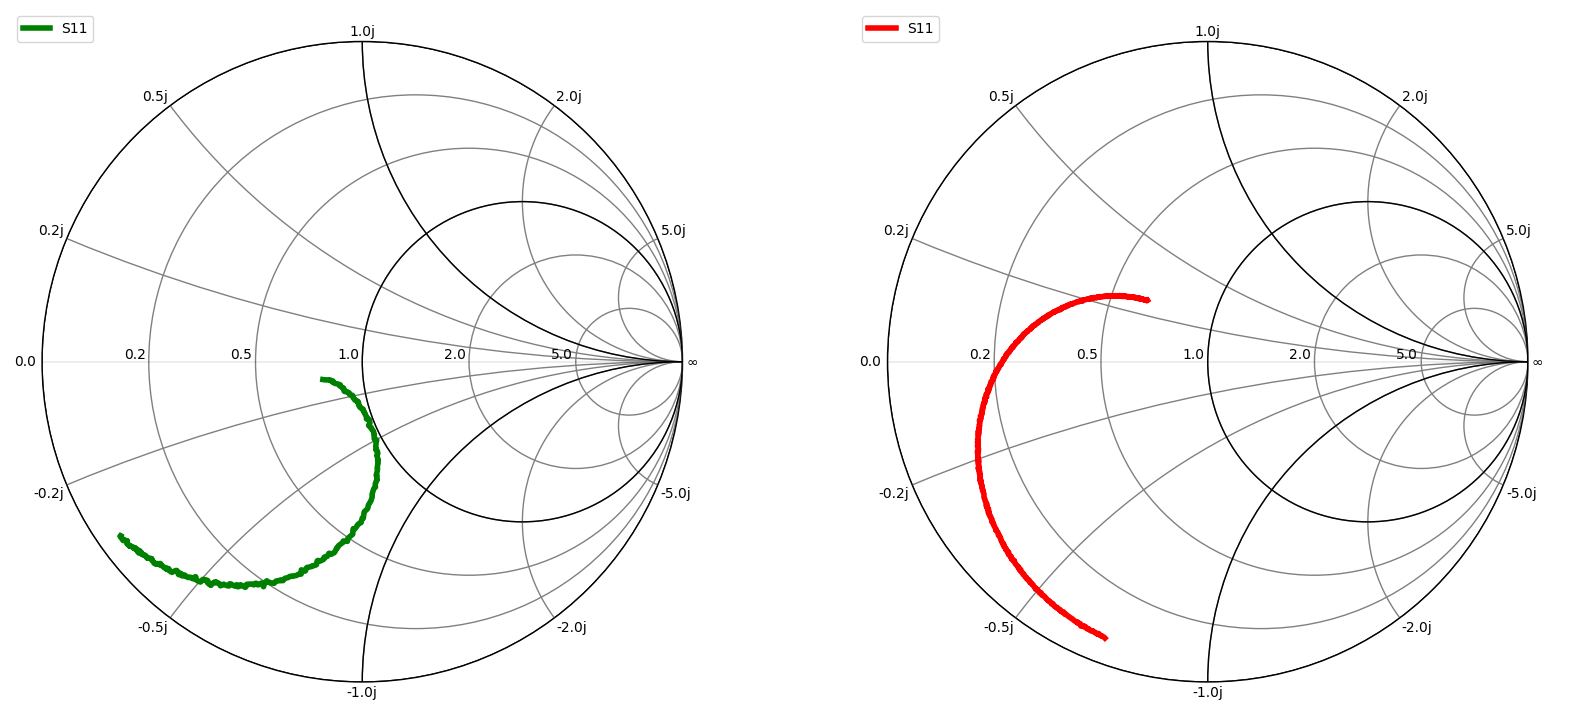

In [34]:
fig, axes = plt.subplots(1,2, figsize=[20,30])

csv7 = pd.read_csv('CSV7.csv', skiprows=13)
csv7.columns = ['Frequency', 'Z_Real', 'Z_Imag', 'components', 'H']
csv7['Z_n'] = csv7['Z_Real']/50 + 1j*csv7['Z_Imag']/50
csv7['S_11'] = ( csv7['Z_n']-1 ) / ( csv7['Z_n']+1 )
real_data_11 = rf.Network(frequency = csv7['Frequency'], s = csv7['S_11'])
real_data_11.plot_s_smith(ax=axes[0], draw_labels=True, color='g', linewidth=4)

csv8 = pd.read_csv('CSV8.csv', skiprows=13)
csv8.columns = ['Frequency', 'Z_Real', 'Z_Imag', 'components', 'H']
csv8['Z_n'] = csv8['Z_Real']/50 + 1j*csv8['Z_Imag']/50
csv8['S_21'] = ( csv8['Z_n']-1 ) / ( csv8['Z_n']+1 )
real_data_22 = rf.Network(frequency = csv8['Frequency'], s = csv8['S_21'])
real_data_22.plot_s_smith(ax=axes[1], draw_labels=True, color='r', linewidth=4)

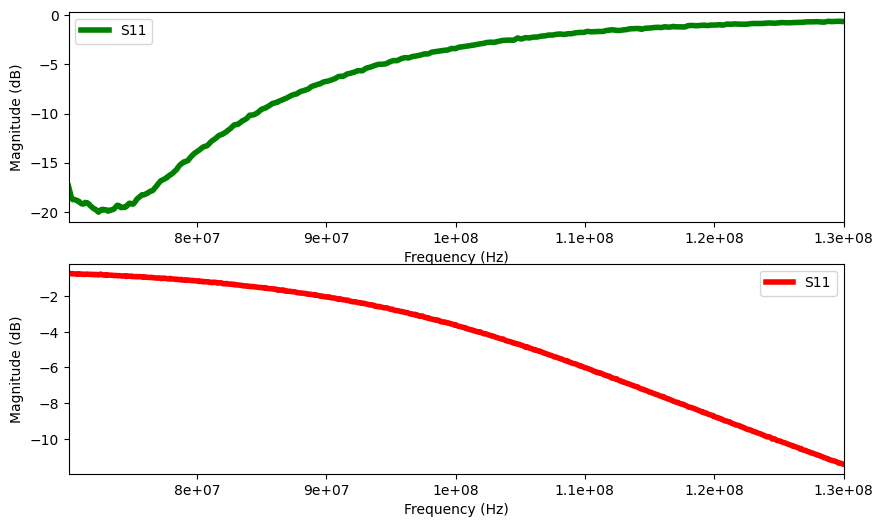

In [35]:
fig, axes = plt.subplots(2,1, figsize=[10,6])

real_data_11.plot_s_db(ax=axes[0], color='g', linewidth=4)
real_data_22.plot_s_db(ax=axes[1], color='r', linewidth=4)


     1.000000e+05  4.162457e+01  3.279533e+00  5.219538e-06  H
0        499866.7     45.253340      1.915612  6.099210e-07  H
1        899733.3     45.638650      1.572002  2.780735e-07  H
2       1299600.0     45.590860      1.319891  1.616398e-07  H
3       1699467.0     45.491010      1.028820  9.634890e-08  H
4       2099333.0     45.166610      0.862867  6.541578e-08  H
..            ...           ...           ...           ... ..
745   298400500.0      1.832955    -41.253800  1.292875e-11  F
746   298800400.0      1.776957    -40.154270  1.326500e-11  F
747   299200300.0      1.739530    -39.069840  1.361496e-11  F
748   299600100.0      1.710317    -38.028480  1.396913e-11  F
749   300000000.0      1.673458    -36.995080  1.434019e-11  F

[750 rows x 5 columns]


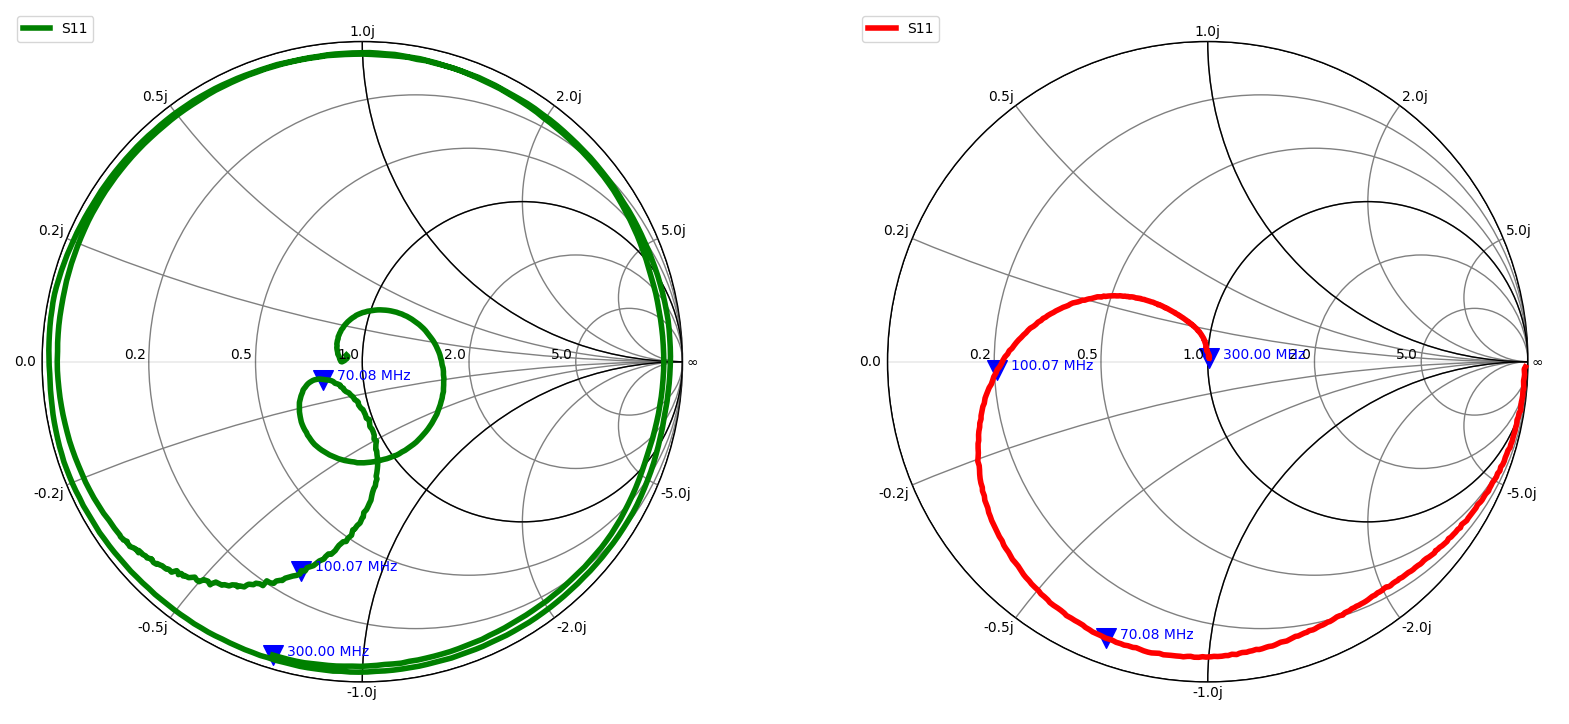

In [36]:
fig, axes = plt.subplots(1,2, figsize=[20,30])

csv9 = pd.read_csv('CSV9.csv', skiprows=13)
print(csv9)
csv9.columns = ['Frequency', 'Z_Real', 'Z_Imag', 'components', 'H']
csv9['Z_n'] = csv9['Z_Real']/50 + 1j*csv9['Z_Imag']/50
csv9['S_11'] = ( csv9['Z_n']-1 ) / ( csv9['Z_n']+1 )
real_data_11 = rf.Network(frequency = csv9['Frequency'], s = csv9['S_11'])
real_data_11.plot_s_smith(ax=axes[0], draw_labels=True, color='g', linewidth=4)

########################
csv10 = pd.read_csv('CSV10.csv', skiprows=13)
csv10.columns = ['Frequency', 'Z_Real', 'Z_Imag', 'components', 'H']
csv10['Z_n'] = csv10['Z_Real']/50 + 1j*csv10['Z_Imag']/50
csv10['S_21'] = ( csv10['Z_n']-1 ) / ( csv10['Z_n']+1 )
real_data_22 = rf.Network(frequency = csv10['Frequency'], s = csv10['S_21'], m=0, n=0)
real_data_22.plot_s_smith(m=0, n=0, ax=axes[1], draw_labels=True, color='r', linewidth=4)

marker_idx = [30, 60, 90]

start_val = real_data_22.s_db[0]
sval = (np.ones(len(real_data_22.s_db)) * start_val).T
plt.plot(real_data_22.f, sval, linewidth=2)


my_arr = real_data_22.s_db[:,0,0]
my_frq = real_data_22.f

loc_at_3 = find(my_arr, -3)
freq_at_3 = my_frq[loc_at_3]/(2*np.pi)
att_at_3 = my_arr[loc_at_3]

loc_at_20 = find(my_arr, -20)
freq_at_20 = my_frq[loc_at_20]/(2*np.pi)
att_at_20 = my_arr[loc_at_20]

loc_100MHz = find(my_frq, 100e6)
loc_70MHz = find(my_frq, 70e6)
loc_300MHz = find(my_frq, 300e6)
marker_idx = [loc_70MHz, loc_100MHz, loc_300MHz]

for i, k in enumerate(marker_idx):
    x = real_data_22.s.real[k, 0, 0]
    y = real_data_22.s.imag[k, 0, 0]
    f = real_data_22.frequency.f_scaled[k]
    axes[1].scatter(x, y, marker = 'v', s=200, color='b')
    axes[1].annotate(f"{my_frq[k]/1e6:.2f} MHz", (x, y), xytext=(10, 0), textcoords='offset points', color='b')

    x = real_data_11.s.real[k, 0, 0]
    y = real_data_11.s.imag[k, 0, 0]
    f = real_data_11.frequency.f_scaled[k]
    axes[0].scatter(x, y, marker = 'v', s=200, color='b')
    axes[0].annotate(f"{my_frq[k]/1e6:.2f} MHz", (x, y), xytext=(10, 0), textcoords='offset points', color='b')

[[-0.52153499]]


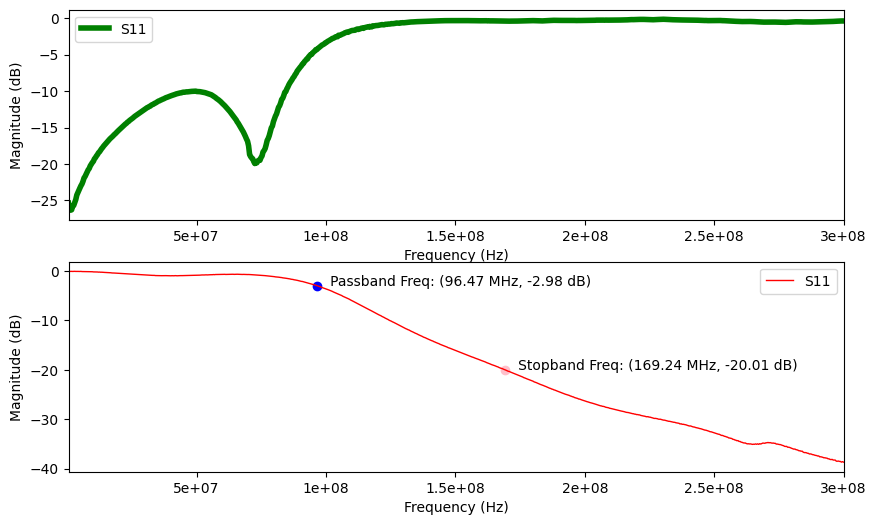

In [37]:
fig, axes = plt.subplots(2,1, figsize=[10,6])

real_data_11.plot_s_db(ax=axes[0], color='g', linewidth=4)
real_data_22.plot_s_db(ax=axes[1], color='r', linewidth=1)

plt.scatter(my_frq[loc_at_3], my_arr[loc_at_3], c='blue')
plt.annotate(f"   Passband Freq: ({my_frq[loc_at_3]/1e6:0.2f} MHz, {my_arr[loc_at_3]:0.2f} dB)", (my_frq[loc_at_3], my_arr[loc_at_3]) )

plt.scatter(my_frq[loc_at_20], my_arr[loc_at_20], c='pink')
plt.annotate(f"   Stopband Freq: ({my_frq[loc_at_20]/1e6:0.2f} MHz, {my_arr[loc_at_20]:0.2f} dB)", (my_frq[loc_at_20], my_arr[loc_at_20]) )

print(real_data_22.s_db[50])

0.9154496682728998
-0.06881931174276346


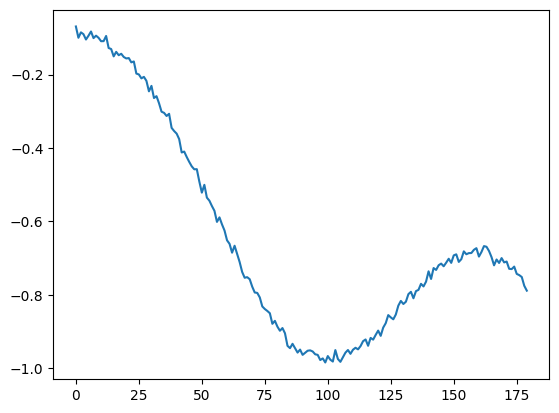

In [34]:
db_orig = real_data_22.s_db[:,0,0]
window_db = db_orig[0:int(len(s21.s_db)*0.018)]
plt.plot(window_db)

print(np.max(window_db) - np.min(window_db))
print(db_orig[0])

## Graphing for the Final Figure Used in Report

In [ ]:
fig, axes = plt.subplots(2,2, figsize=[10,10])

## 0, 0 -> analytical
axCurr = axes[0][0]

axCurr.set_title("Magnitude of Analytical Model S21")
axCurr.set_xlabel("Frequency")
axCurr.set_ylabel("Attenuation")
plt.xscale("log")
end = -1

pb_analytical = find(analyticalRF.s_db, -1)
ct_analytical = find(analyticalRF.s_db, -3)
sb_analytical = find(analyticalRF.s_db, -20)

#axCurr.scatter(my_frq[loc_at_3], my_arr[loc_at_3], c='blue')
# plt.annotate(f"   Passband Freq: ({my_frq[loc_at_3]/1e6:0.2f} MHz, {my_arr[loc_at_3]:0.2f} dB)", (my_frq[loc_at_3], my_arr[loc_at_3]) )

# plt.scatter(my_frq[loc_at_20], my_arr[loc_at_20], c='pink')
# plt.annotate(f"   Stopband Freq: ({my_frq[loc_at_20]/1e6:0.2f} MHz, {my_arr[loc_at_20]:0.2f} dB)", (my_frq[loc_at_20], my_arr[loc_at_20]) )

plt.plot(freq_ratios[:end], -att1[:end], linewidth=1, label="Chebyshev 1")



In [ ]:
for i, k in enumerate(marker_idx):
    x = real_data_22.s.real[k, 0, 0]
    y = real_data_22.s.imag[k, 0, 0]
    f = real_data_22.frequency.f_scaled[k]
    axes[1].scatter(x, y, marker = 'v', s=200, color='b')
    axes[1].annotate(f"{my_frq[k]/1e6:.2f} MHz", (x, y), xytext=(10, 0), textcoords='offset points', color='b')